# A Theory of Extramarital Affairs - Statsmodel Dataset

In [3]:
# Import Data Analytic modules

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import math

In [2]:
# Import Data Visualization modules

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [4]:
# Import Machine Learning modules

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [6]:
# Import Machine Learning Eavluation module

from sklearn import metrics

In [7]:
# Dataset import

import statsmodels.api as sm

In [8]:
df = sm.datasets.fair.load_pandas().data

In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [17]:
def affair_check(x):
    if x == 0:
        return 0
    else:
        return 1

In [18]:
df['had_aff'] = df['affairs'].apply(affair_check)

df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_aff
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [20]:
df.groupby('had_aff').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_aff,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


## Visualizing Data

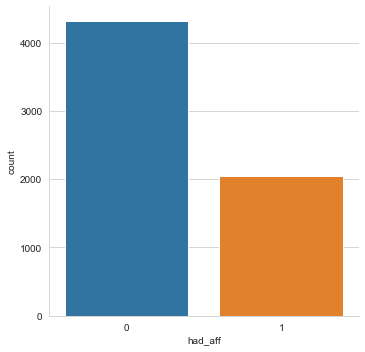

In [25]:
# Comparing women who had affairs vs women who didn't have affairs

sns.catplot(x = 'had_aff', kind = 'count', data = df)

In [ ]:
# 66% of women don't have an affair

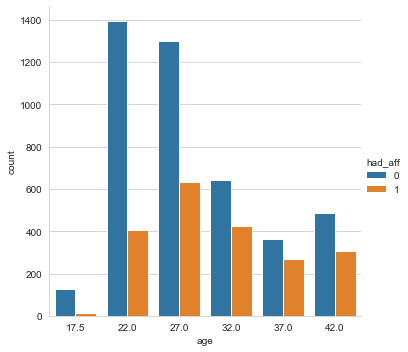

In [23]:
# Understanging if age of the woen has an effect on having an affair

sns.catplot(x = 'age', kind = 'count', data = df, hue = 'had_aff')

In [ ]:
# With increase in age there is a possibility of having an affair increases

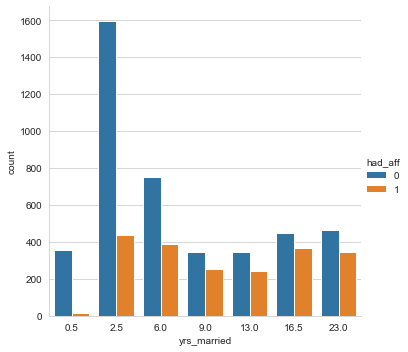

In [24]:
# Does age of marriage play a role in having an affair?

sns.catplot(x = 'yrs_married', kind = 'count', data = df, hue = 'had_aff')

In [ ]:
# With increase in years of marriage there is a possibility of having an affair increases

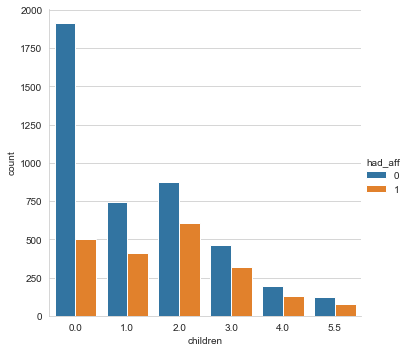

In [26]:
# Does having children play a role in having an affair?

sns.catplot(x = 'children', kind = 'count', data = df, hue = 'had_aff')

In [ ]:
# Having children increases the possibility of having an affair

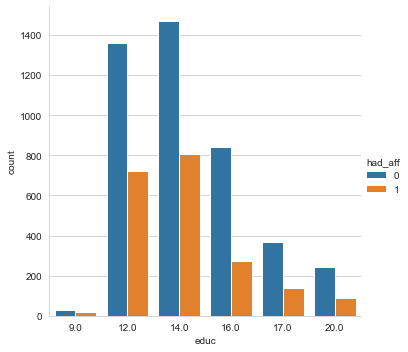

In [28]:
# Does having education play a role in having an affair?

sns.catplot(x = 'educ', kind = 'count', data = df, hue = 'had_aff')

In [29]:
# its difficult to make an infer if education plays a role in  having an affair

## Preparing Dataset for Machine leaning

In [65]:
# On reviewing dataset, Occupation and husbands occupation are in form of categorical variables

# Creating dataframe for categorical variables

occ_dummies = pd.get_dummies(df['occupation'])

hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [66]:
# previewing occ_dummies

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [67]:
# naming columns for the dummy dataframes

occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [68]:
# Creating X and Y datasets for the Logistic Regression

# Replacing 'occupation', 'occupation_husb' with the new 'occ_dummies' and 'hus_occ_dummies' columns

X  = df.drop(['occupation', 'occupation_husb', 'had_aff'], axis = 1)

In [69]:
X = pd.concat([X,occ_dummies,hus_occ_dummies ],axis = 1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [70]:
Y = df['had_aff']

In [71]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_aff, dtype: int64

## Multicolinearity consideration

As dummy variables are highly corelated 'occ1' and 'hocc1' will be dropped. This will avoid the model being distorted.

In [72]:
X = X.drop('hocc1', axis = 1)

In [73]:
X = X.drop('occ1', axis = 1)

In [74]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [75]:
# dropping 'affairs' column as the column represents the same as our target column 'had_aff'

X = X.drop('affairs', axis = 1)

In [77]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [78]:
# For using Y table with sckitlearn, it needs to be a 1-D array

np.ravel(Y)

array([1, 1, 1, ..., 0, 0, 0])

## Building out the Logistic Regression Model for the data

In [81]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit data
log_model.fit(X,Y)

# Checking for model accuracy
log_model.score(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [82]:
Y.mean()

0.3224945020420987

The model is ~73% accurate this is 5% more when compared to null error rate

In [84]:
# Checking the coefficients of the model

coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [86]:
coeff_df

,0,1
0,rate_marriage,[-0.6978455096539518]
1,age,[-0.05633632456391041]
2,yrs_married,[0.10389299187350667]
3,children,[0.01818532144142296]
4,religious,[-0.3685066403819364]
5,educ,[0.008647374145728168]
6,occ2,[0.2981188865493084]
7,occ3,[0.6081502910503018]
8,occ4,[0.3465112689847115]
9,occ5,[0.9422595517777723]


With increase in rate_marriage, age, religious the possibility of having an affair decreases

## Preparing the Training and Testing datasets

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [89]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
class_predict = logistic_model.predict(X_test)

In [91]:
print(metrics.accuracy_score(Y_test,class_predict ))

0.7167085427135679


In [ ]:
# We have an accuracy score of ~72% which is close to the initial accuracy of 72.5% 